<a href="https://colab.research.google.com/github/Yassmina-Abdo/dry-beans-classification/blob/main/Notebooks/trial1_featureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Modules Imports

In [ ]:
!pip install skfeature-chappers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 3.4 MB/s 


In [ ]:
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler, normalize,  Normalizer, PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from xgboost import XGBClassifier
import math
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Data Preprocessing

# Read Data

In [ ]:
path ='/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/train.csv'

In [ ]:
def read_data(path):
  df =pd.read_csv(path,index_col='ID')
  print(df.shape) 
  # Target Manual Encoding case train file
  df.replace({'y':{'BARBUNYA':1,'BOMBAY':2,'CALI':3,'DERMASON':4,'HOROZ':5,'SEKER':6,'SIRA':7}},inplace=True)
  return df 

In [ ]:
# train test split before oversampling
def My_train_test_split(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.20)
  return X_train, X_test, y_train, y_test

## ALL Scaling Techniques 

1. Standarization

In [ ]:
#1
def apply_StandardScaler(X_f):
  scaler1 = StandardScaler()
  # Create a list of the variables that you need to scale
  varlist = X_f.columns
  # Scale these variables using 'fit_transform'
  X_f[varlist] = scaler1.fit_transform(X_f[varlist])
  return X_f

In [ ]:
#2
def apply_MaxAbsScaler(X_f):
  scaler2 = MaxAbsScaler()
  # Create a list of the variables that you need to scale
  varlist = X_f.columns
  # Scale these variables using 'fit_transform'
  X_f[varlist] = scaler2.fit_transform(X_f[varlist])
  return X_f

In [ ]:
#3
def apply_MinMaxScaler(X_f):
  scaler3 = MinMaxScaler()
  # Create a list of the variables that you need to scale
  varlist = X_f.columns
  # Scale these variables using 'fit_transform'
  X_f[varlist] = scaler3.fit_transform(X_f[varlist])
  return X_f

In [ ]:
#4
# the best for data with outliers
def apply_RobustScaler(X_f):
  scaler4 = RobustScaler()
  # Create a list of the variables that you need to scale
  varlist = X_f.columns
  # Scale these variables using 'fit_transform'
  X_f[varlist] = scaler4.fit_transform(X_f[varlist])
  return X_f

2. Normalization

In [ ]:
#1 
def apply_normalize(X_f):
  normalizer = Normalizer()
  # Create a list of the variables that you need to scale
  varlist = X_f.columns
  # Scale these variables using 'fit_transform'
  X_f[varlist] = normalizer.fit_transform(X_f[varlist])
  return X_f

In [ ]:
#2 
def apply_PowerTransformer(X_f):
  transformer = PowerTransformer()
  # Create a list of the variables that you need to scale
  varlist = X_f.columns
  # Scale these variables using 'fit_transform'
  X_f[varlist] = transformer.fit_transform(X_f[varlist])
  return X_f

>## Upsampling 

## Using SMOTE

In [ ]:
def apply_Upsmote_Training(x, y):
  # set each label to 2270
  df = x.join(y)
  x = x.values
  y = y.values
  strategy = {1:2270, 2:2270, 3:2270, 4:2270, 5:2270, 6:2270,7:2270}
  oversample = SMOTE(sampling_strategy=strategy)
  features, target = oversample.fit_resample(x, y)

  # convert to Dataframe
  oversampled_data =pd.concat([ pd.DataFrame(features),pd.DataFrame(target)], axis=1)
  # oversampled_data[0]=oversampled_data[0].astype(int) # set ID col as int
  oversampled_data.columns= list(df.columns)
 
  return oversampled_data

In [ ]:
def apply_Upsmote_valid(x, y):
  # set each label to 710
  df = x.join(y)
  x = x.values
  y = y.values
  strategy = {1:567, 2:567, 3:567, 4:567, 5:567, 6:567,7:567}
  oversample = SMOTE(sampling_strategy=strategy)
  features, target = oversample.fit_resample(x, y)

  # convert to Dataframe
  oversampled_data =pd.concat([ pd.DataFrame(features),pd.DataFrame(target)], axis=1)
  # oversampled_data[0]=oversampled_data[0].astype(int) # set ID col as int
  oversampled_data.columns= list(df.columns)
 
  return oversampled_data

In [ ]:
def get_num_of_samples(df):
  labels=df.y.unique()
  for label in labels:  
    print('Number of samples in class {} = {}'.format(label,len(df[df.y == label])))

In [ ]:
df_all = read_data(path)
df_all.head()

(10834, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,5
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,6
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,4
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,4
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,7


## Data fields

ID - an ID for this instance

Area - (A), The area of a bean zone and the number of pixels within its boundaries.

Perimeter - (P), Bean circumference is defined as the length of its border.

MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.

MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.

AspectRatio - (K), Defines the relationship between L and l.

Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.

ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.

Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.

Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

Roundness - (R), Calculated with the following formula: (4piA)/(P^2)

Compactness - (CO), Measures the roundness of an object: Ed/L

ShapeFactor1 - (SF1)

ShapeFactor2 - (SF2)

ShapeFactor3 - (SF3)

ShapeFactor4 - (SF4)

y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.


In [ ]:
get_num_of_samples(df_all)

Number of samples in class 5 = 1488
Number of samples in class 6 = 1621
Number of samples in class 4 = 2837
Number of samples in class 7 = 2109
Number of samples in class 1 = 1057
Number of samples in class 3 = 1304
Number of samples in class 2 = 418


4    2837
7    2109
6    1621
5    1488
3    1304
1    1057
2     418
Name: y, dtype: int64


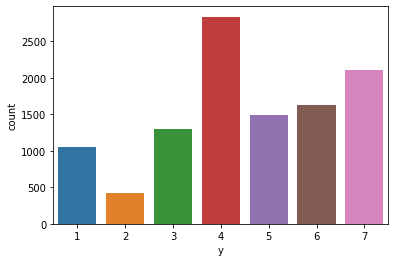

In [ ]:
print(df_all['y'].value_counts())
_ = sns.countplot(x='y', data=df_all)

In [ ]:
corr = df_all.corr()
corr.style.background_gradient(cmap='coolwarm')

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
Area,1.000000,0.966881,0.933198,0.952536,0.243893,0.268565,0.999940,0.984987,0.061387,-0.200078,-0.354127,-0.270134,-0.848371,-0.640619,-0.274081,-0.365265,-0.474164
Perimeter,0.966881,1.000000,0.977830,0.915162,0.386119,0.390878,0.967823,0.991439,-0.013889,-0.307817,-0.543906,-0.407622,-0.866250,-0.768104,-0.409079,-0.439272,-0.507765
MajorAxisLength,0.933198,0.977830,1.000000,0.830452,0.548912,0.539787,0.933934,0.962754,-0.070935,-0.285916,-0.589910,-0.566905,-0.777222,-0.858387,-0.566625,-0.491591,-0.456807
MinorAxisLength,0.952536,0.915162,0.830452,1.000000,-0.003095,0.024388,0.952268,0.949832,0.152157,-0.160567,-0.211275,-0.021042,-0.947040,-0.476659,-0.025152,-0.273554,-0.457526
AspectRation,0.243893,0.386119,0.548912,-0.003095,1.000000,0.924040,0.245408,0.305557,-0.372383,-0.266038,-0.762150,-0.987664,0.019197,-0.837526,-0.978550,-0.456479,-0.121283
Eccentricity,0.268565,0.390878,0.539787,0.024388,0.924040,1.000000,0.270283,0.319497,-0.319550,-0.295614,-0.716765,-0.970173,0.015644,-0.859207,-0.980946,-0.453895,-0.204183
ConvexArea,0.999940,0.967823,0.933934,0.952268,0.245408,0.270283,1.000000,0.985223,0.059711,-0.209552,-0.358655,-0.271930,-0.848345,-0.642119,-0.275901,-0.371420,-0.476363
EquivDiameter,0.984987,0.991439,0.962754,0.949832,0.305557,0.319497,0.985223,1.000000,0.035291,-0.234767,-0.432327,-0.329457,-0.893598,-0.714397,-0.332067,-0.402038,-0.480921
Extent,0.061387,-0.013889,-0.070935,0.152157,-0.372383,-0.319550,0.059711,0.035291,1.000000,0.180843,0.341669,0.355279,-0.147888,0.235020,0.348442,0.142275,-0.034010
Solidity,-0.200078,-0.307817,-0.285916,-0.160567,-0.266038,-0.295614,-0.209552,-0.234767,0.180843,1.000000,0.614744,0.301718,0.158452,0.343114,0.305648,0.695040,0.327622


In [ ]:
# sns.pairplot(df_all, hue="y", diag_kind="hist")

In [ ]:
X = df_all.loc[:, "Area":"ShapeFactor4"]
y = df_all['y']
print(X)
print(y)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                        
0      58238    971.303       397.202654       186.945510      2.124697   
1      44515    757.601       265.590470       213.967453      1.241266   
2      31662    653.783       239.902428       168.421505      1.424417   
3      38778    734.020       268.446281       184.061923      1.458456   
4      42530    775.403       281.212824       193.236878      1.455275   
...      ...        ...              ...              ...           ...   
10829  37777    716.007       250.174662       192.704033      1.298233   
10830  32187    667.621       247.778775       165.786862      1.494562   
10831  81837   1095.937       433.838186       241.527026      1.796230   
10832  48212    826.362       309.639462       199.285811      1.553746   
10833  28026    610.943       215.446569       165.740377      1.299904   

       Eccentricity  Con

In [ ]:
X_copy = X.copy()
y_copy  = y.copy()
print(X_copy)
print(y_copy)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                        
0      58238    971.303       397.202654       186.945510      2.124697   
1      44515    757.601       265.590470       213.967453      1.241266   
2      31662    653.783       239.902428       168.421505      1.424417   
3      38778    734.020       268.446281       184.061923      1.458456   
4      42530    775.403       281.212824       193.236878      1.455275   
...      ...        ...              ...              ...           ...   
10829  37777    716.007       250.174662       192.704033      1.298233   
10830  32187    667.621       247.778775       165.786862      1.494562   
10831  81837   1095.937       433.838186       241.527026      1.796230   
10832  48212    826.362       309.639462       199.285811      1.553746   
10833  28026    610.943       215.446569       165.740377      1.299904   

       Eccentricity  Con

In [ ]:
# Let's see the data types and non-null values for each column
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  int64  
dtypes: float64(1

In [ ]:
round(df_all.isnull().sum(axis=0)*100/df_all.shape[0],2)

Area               0.0
Perimeter          0.0
MajorAxisLength    0.0
MinorAxisLength    0.0
AspectRation       0.0
Eccentricity       0.0
ConvexArea         0.0
EquivDiameter      0.0
Extent             0.0
Solidity           0.0
roundness          0.0
Compactness        0.0
ShapeFactor1       0.0
ShapeFactor2       0.0
ShapeFactor3       0.0
ShapeFactor4       0.0
y                  0.0
dtype: float64

In [ ]:
bool_series = df_all.duplicated().sum()
bool_series 

0

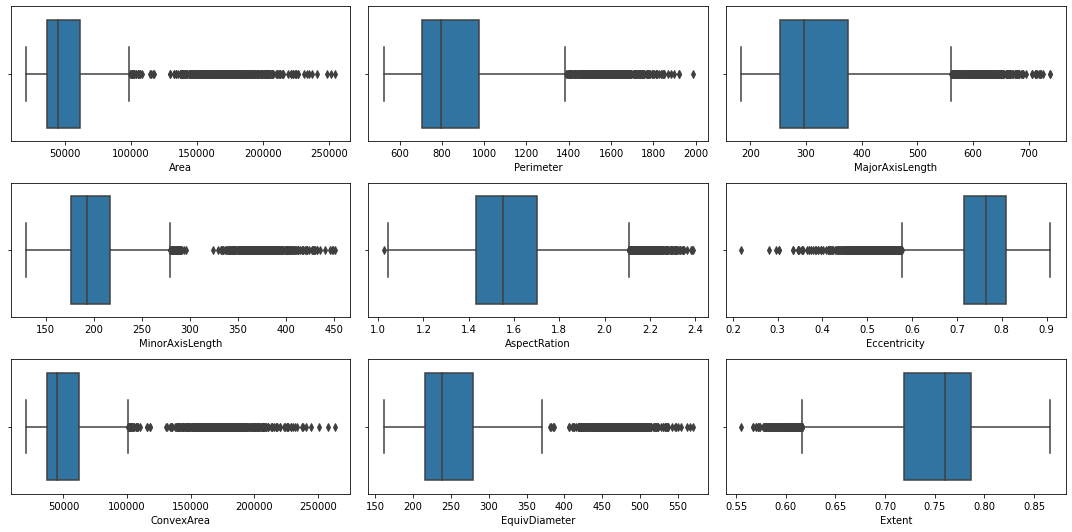

In [ ]:
#exploring the data after making sure all data that you want to get its boxplot are numerical 
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df_all['Area'], ax = axs[0,0])
plt2 = sns.boxplot(df_all['Perimeter'], ax = axs[0,1])
plt3 = sns.boxplot(df_all['MajorAxisLength'], ax = axs[0,2])
plt4 = sns.boxplot(df_all['MinorAxisLength'], ax = axs[1,0])
plt5 = sns.boxplot(df_all['AspectRation'], ax = axs[1,1])
plt6 = sns.boxplot(df_all['Eccentricity'], ax = axs[1,2])
plt7 = sns.boxplot(df_all['ConvexArea'], ax = axs[2,0])
plt8 = sns.boxplot(df_all['EquivDiameter'], ax = axs[2,1])
plt9 = sns.boxplot(df_all['Extent'], ax = axs[2,2])
plt.tight_layout()

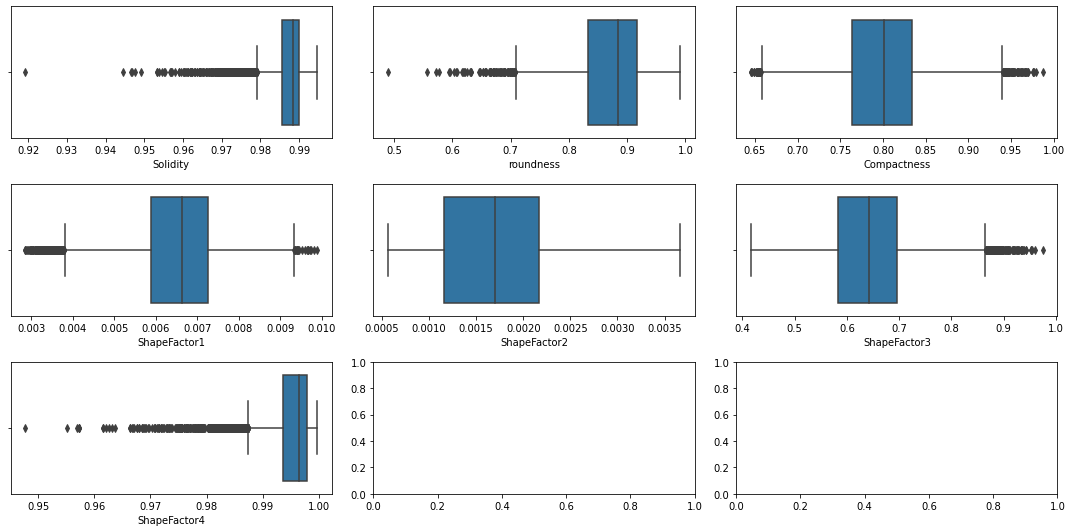

In [ ]:
#exploring the data after making sure all data that you want to get its boxplot are numerical 
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df_all['Solidity'], ax = axs[0,0])
plt2 = sns.boxplot(df_all['roundness'], ax = axs[0,1])
plt3 = sns.boxplot(df_all['Compactness'], ax = axs[0,2])
plt4 = sns.boxplot(df_all['ShapeFactor1'], ax = axs[1,0])
plt5 = sns.boxplot(df_all['ShapeFactor2'], ax = axs[1,1])
plt6 = sns.boxplot(df_all['ShapeFactor3'], ax = axs[1,2])
plt7 = sns.boxplot(df_all['ShapeFactor4'], ax = axs[2,0])
# plt8 = sns.boxplot(df_all['EquivDiameter'], ax = axs[2,1])
# plt9 = sns.boxplot(df_all['Extent'], ax = axs[2,2])
plt.tight_layout()

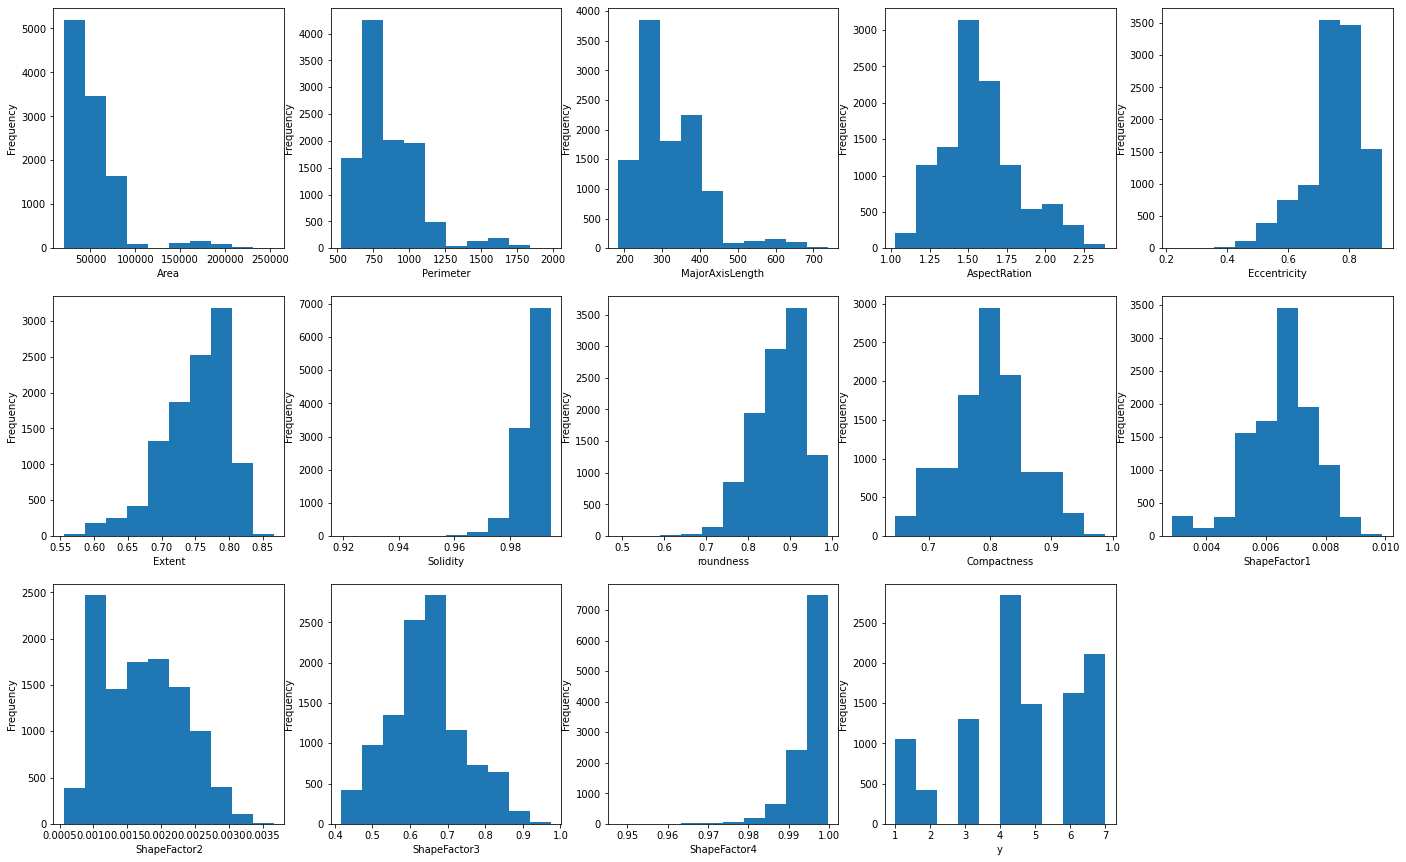

In [ ]:
# select numeric variables
numeric_vars =  ['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 
                 'ShapeFactor4', 'y']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    df_all[var].plot(kind = 'hist')

In [ ]:
X_MinMaxScaler_scaled = apply_MinMaxScaler(X_copy)
X_MinMaxScaler_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
0,0.161480,0.305642,0.384688,0.178526,0.806323,0.962493,0.157859,0.272126,0.159036,0.904445,0.570991,0.117547,0.563053,0.117763,0.095822,0.978144
1,0.102884,0.159315,0.147660,0.262615,0.158649,0.541875,0.099333,0.188244,0.696185,0.992108,0.967937,0.734115,0.441765,0.584350,0.693236,0.954606
2,0.048003,0.088228,0.101396,0.120882,0.292923,0.715573,0.046789,0.096876,0.791600,0.916611,0.880589,0.560232,0.670512,0.557595,0.508634,0.961666
3,0.078387,0.143168,0.152803,0.169553,0.317879,0.738483,0.076363,0.149359,0.678145,0.925168,0.827875,0.533333,0.577583,0.464513,0.481208,0.990730
4,0.094408,0.171504,0.175795,0.198104,0.315547,0.736430,0.092111,0.175090,0.561313,0.917125,0.796852,0.532649,0.533480,0.434817,0.480514,0.938025


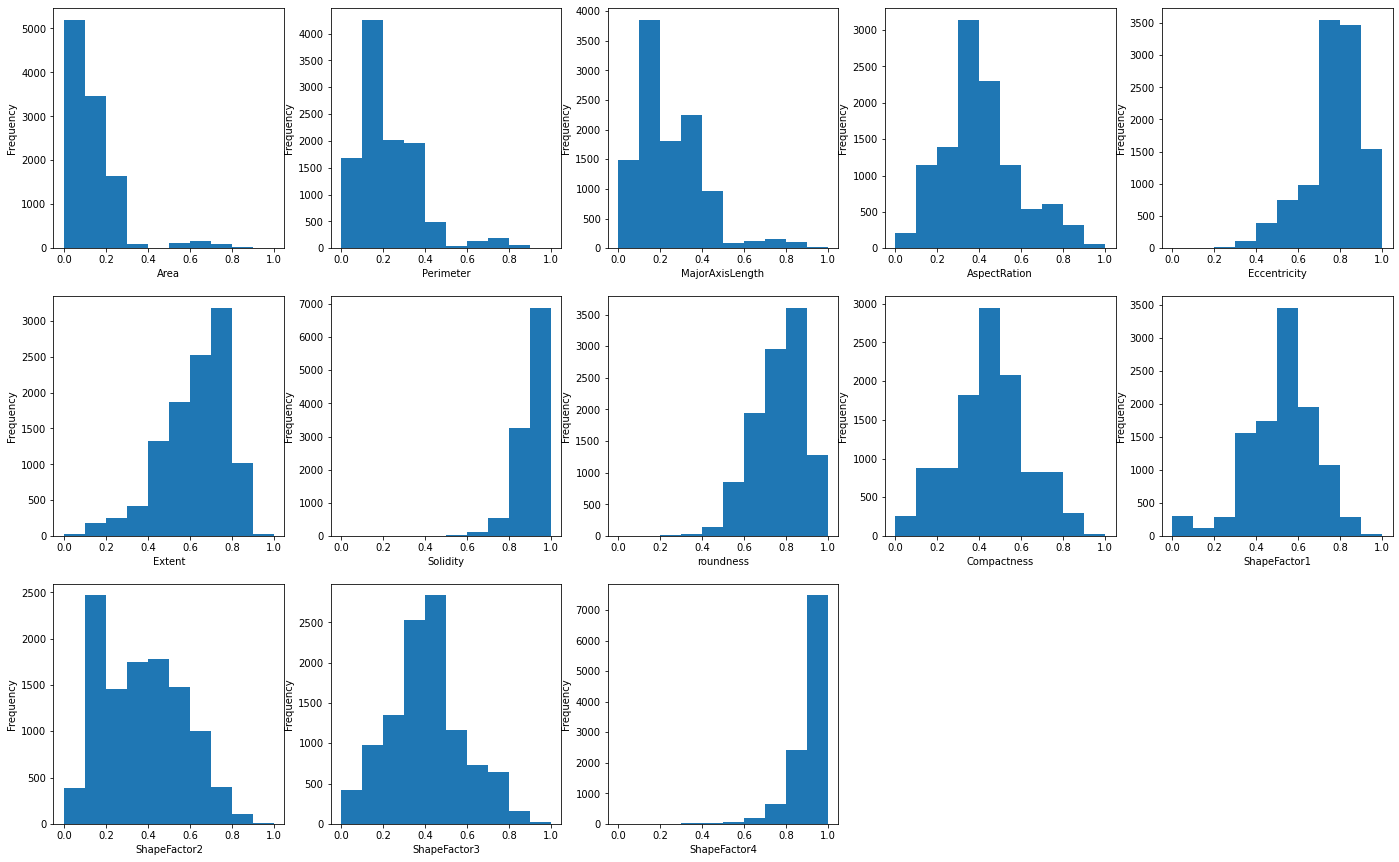

In [ ]:
# select numeric variables
numeric_vars =  ['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 
                 'ShapeFactor4']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    X_MinMaxScaler_scaled[var].plot(kind = 'hist')

In [ ]:
X_StandardScaler_scaled = apply_StandardScaler(X_copy)
X_StandardScaler_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
0,0.174073,0.539713,0.897727,-0.342811,2.224308,1.440028,0.172036,0.322783,-2.966134,0.068758,-1.650182,-1.873127,0.231513,-1.328445,-1.772230,0.815760
1,-0.290465,-0.454337,-0.633401,0.256188,-1.391835,-1.729039,-0.301224,-0.253265,0.445540,1.498190,1.701569,1.570313,-0.526343,1.109856,1.621877,0.531237
2,-0.725552,-0.937254,-0.932247,-0.753434,-0.642144,-0.420342,-0.726114,-0.880726,1.051566,0.267127,0.964020,0.599206,0.902962,0.970037,0.573092,0.616586
3,-0.484668,-0.564026,-0.600178,-0.406731,-0.502811,-0.247737,-0.486967,-0.520301,0.330964,0.406669,0.518910,0.448979,0.322302,0.483610,0.417275,0.967898
4,-0.357659,-0.371530,-0.451657,-0.203349,-0.515832,-0.263202,-0.359627,-0.343598,-0.411095,0.275515,0.256953,0.445159,0.046731,0.328421,0.413335,0.330810


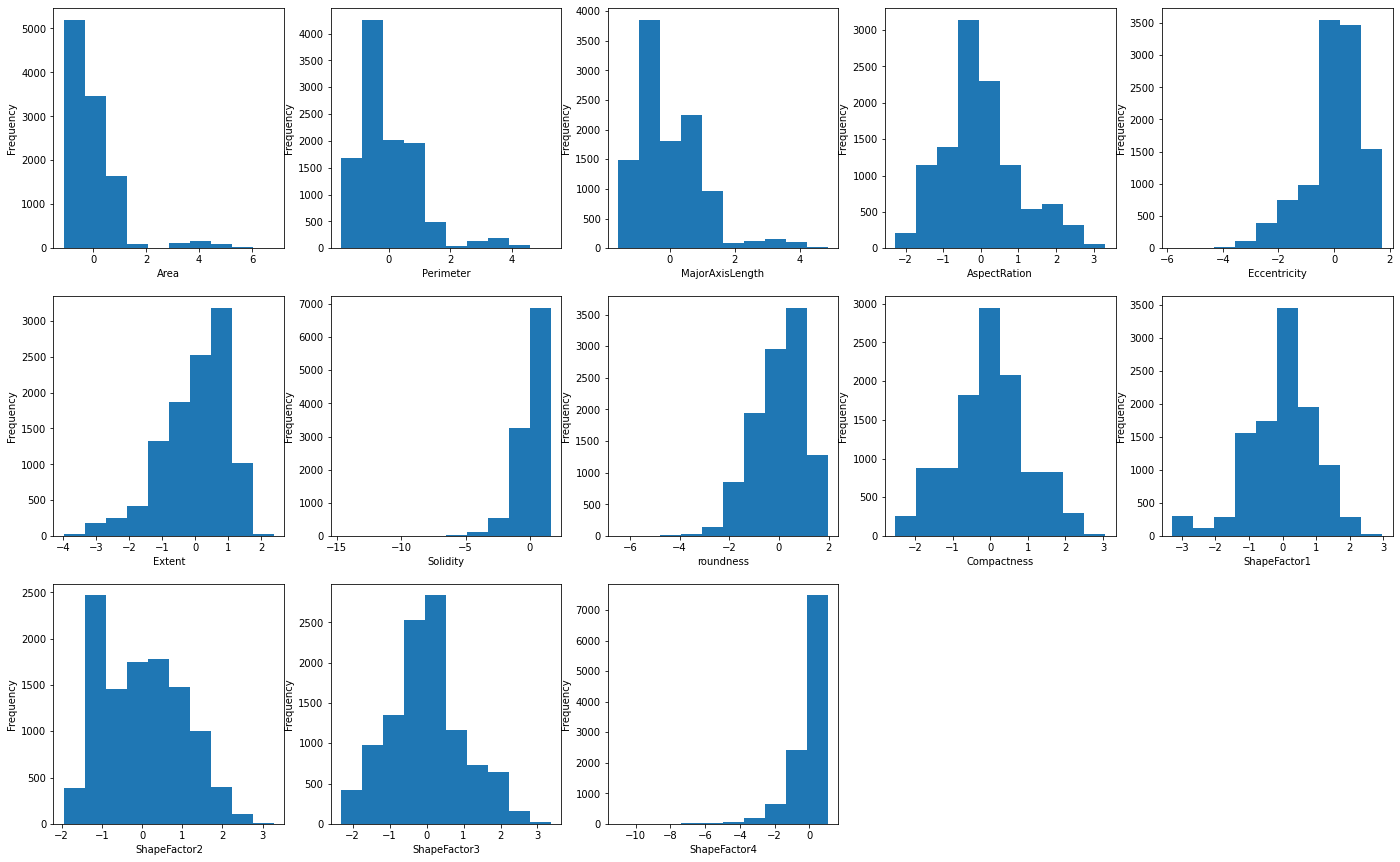

In [ ]:
# select numeric variables
numeric_vars =  ['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 
                 'ShapeFactor4']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    X_StandardScaler_scaled[var].plot(kind = 'hist')

In [ ]:
X_RobustScaler_scaled = apply_RobustScaler(X_copy)
X_RobustScaler_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
0,0.544777,0.653008,0.822611,-0.134810,2.125342,1.266132,0.541883,0.527444,-2.281944,-0.187074,-1.291886,-1.639088,0.128419,-0.764359,-1.525751,0.522756
1,-0.005210,-0.132903,-0.251184,0.518081,-1.146089,-1.844348,-0.014420,-0.005407,0.170410,1.320036,1.092843,1.343318,-0.490484,0.669985,1.427720,0.231459
2,-0.520329,-0.514704,-0.460767,-0.582377,-0.467863,-0.559845,-0.513866,-0.585815,0.606030,0.022075,0.568085,0.502230,0.676757,0.587736,0.515092,0.318841
3,-0.235136,-0.219625,-0.227884,-0.204482,-0.341812,-0.390431,-0.232756,-0.252418,0.088051,0.169199,0.251395,0.372117,0.202562,0.301592,0.379505,0.678516
4,-0.084764,-0.067434,-0.123724,0.017199,-0.353592,-0.405610,-0.083071,-0.088966,-0.445350,0.030919,0.065016,0.368808,-0.022484,0.210301,0.376076,0.026261


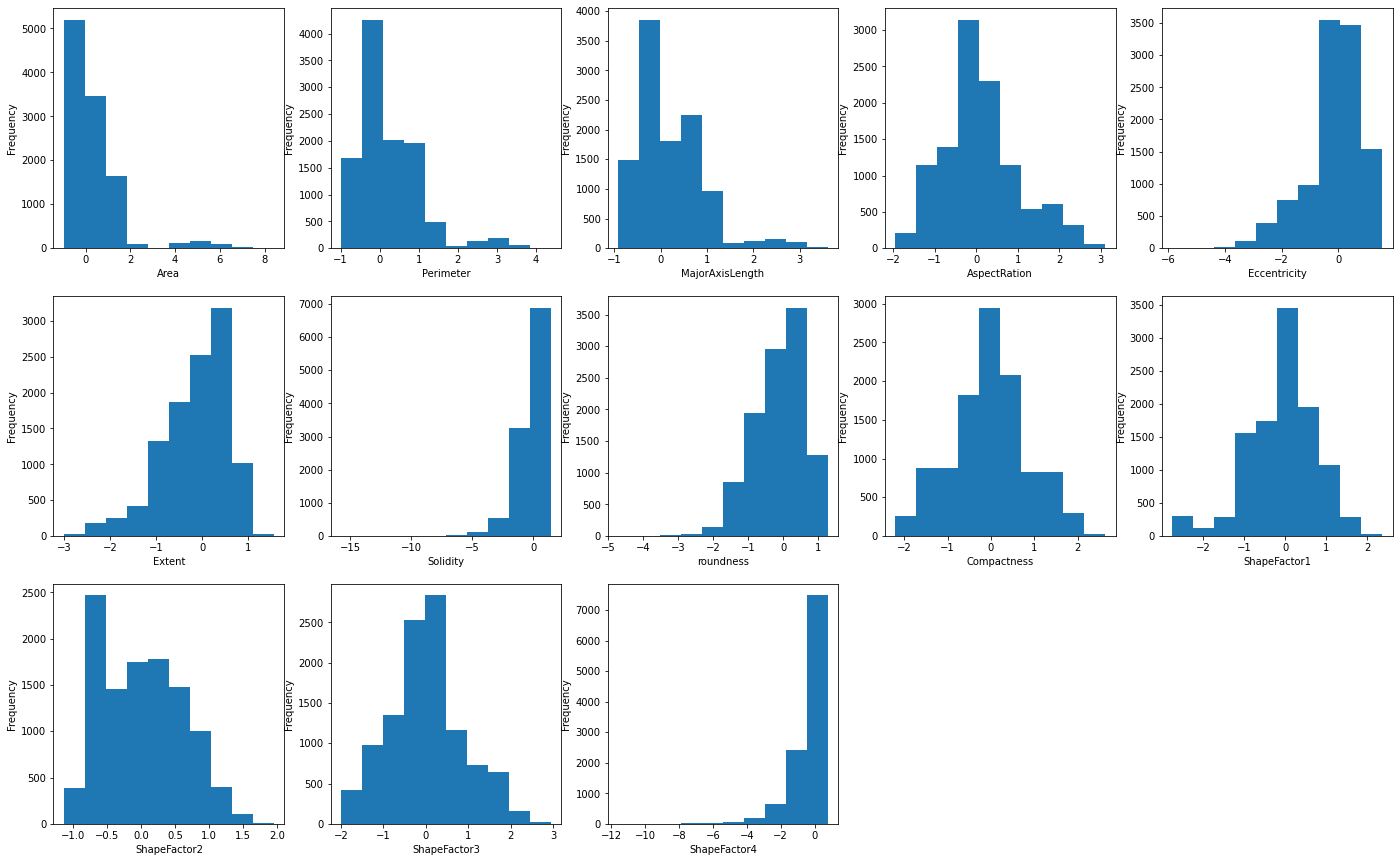

In [ ]:
# select numeric variables
numeric_vars =  ['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 
                 'ShapeFactor4']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    X_RobustScaler_scaled[var].plot(kind = 'hist')

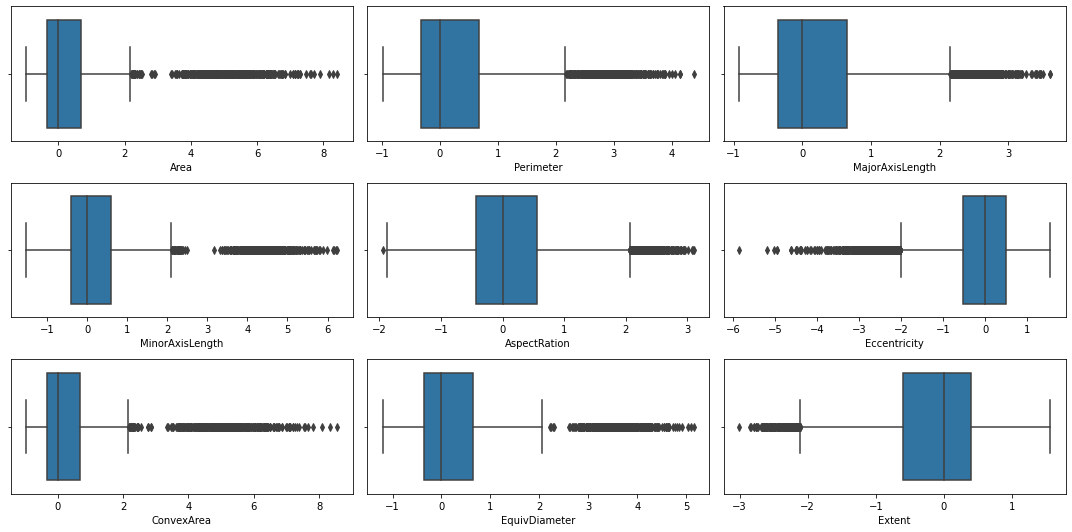

In [ ]:
#exploring the data after making sure all data that you want to get its boxplot are numerical 
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(X_RobustScaler_scaled['Area'], ax = axs[0,0])
plt2 = sns.boxplot(X_RobustScaler_scaled['Perimeter'], ax = axs[0,1])
plt3 = sns.boxplot(X_RobustScaler_scaled['MajorAxisLength'], ax = axs[0,2])
plt4 = sns.boxplot(X_RobustScaler_scaled['MinorAxisLength'], ax = axs[1,0])
plt5 = sns.boxplot(X_RobustScaler_scaled['AspectRation'], ax = axs[1,1])
plt6 = sns.boxplot(X_RobustScaler_scaled['Eccentricity'], ax = axs[1,2])
plt7 = sns.boxplot(X_RobustScaler_scaled['ConvexArea'], ax = axs[2,0])
plt8 = sns.boxplot(X_RobustScaler_scaled['EquivDiameter'], ax = axs[2,1])
plt9 = sns.boxplot(X_RobustScaler_scaled['Extent'], ax = axs[2,2])
plt.tight_layout()

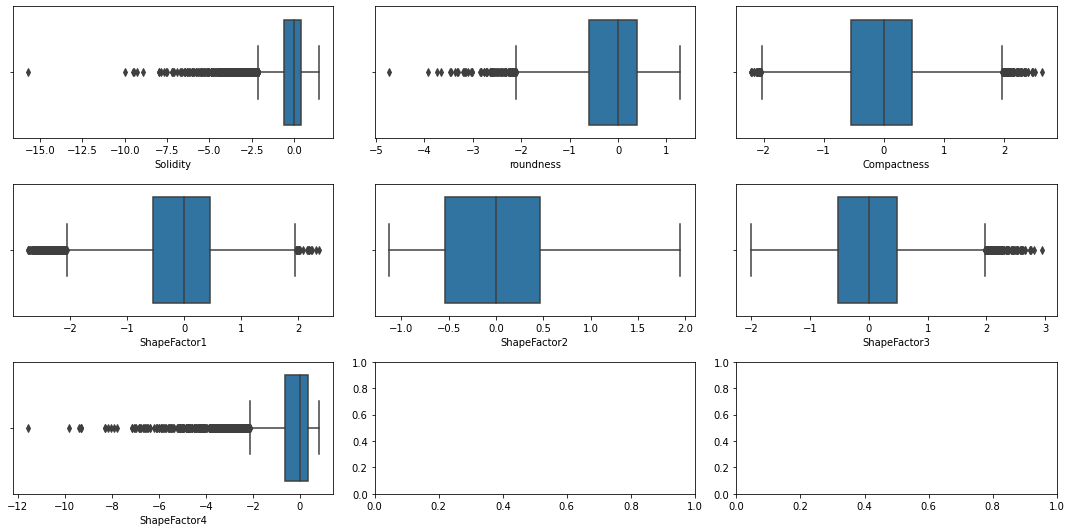

In [ ]:
#exploring the data after making sure all data that you want to get its boxplot are numerical 
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(X_RobustScaler_scaled['Solidity'], ax = axs[0,0])
plt2 = sns.boxplot(X_RobustScaler_scaled['roundness'], ax = axs[0,1])
plt3 = sns.boxplot(X_RobustScaler_scaled['Compactness'], ax = axs[0,2])
plt4 = sns.boxplot(X_RobustScaler_scaled['ShapeFactor1'], ax = axs[1,0])
plt5 = sns.boxplot(X_RobustScaler_scaled['ShapeFactor2'], ax = axs[1,1])
plt6 = sns.boxplot(X_RobustScaler_scaled['ShapeFactor3'], ax = axs[1,2])
plt7 = sns.boxplot(X_RobustScaler_scaled['ShapeFactor4'], ax = axs[2,0])
# plt8 = sns.boxplot(df_all['EquivDiameter'], ax = axs[2,1])
# plt9 = sns.boxplot(df_all['Extent'], ax = axs[2,2])
plt.tight_layout()

In [ ]:
X_MaxAbsScaler_scaled = apply_MaxAbsScaler(X_copy)
X_MaxAbsScaler_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
0,0.064738,0.149009,0.227863,-0.021593,0.684797,0.216377,0.063403,0.102393,-0.758618,-0.011888,-0.273575,-0.623362,0.046788,-0.392433,-0.518206,0.045133
1,-0.000619,-0.030327,-0.069578,0.082981,-0.369276,-0.315191,-0.001687,-0.001050,0.056652,0.083884,0.231425,0.510877,-0.178701,0.343980,0.484911,0.019984
2,-0.061832,-0.117450,-0.127632,-0.093280,-0.150748,-0.095675,-0.060125,-0.113724,0.201471,0.001403,0.120300,0.191003,0.246567,0.301752,0.174946,0.027528
3,-0.027942,-0.050116,-0.063124,-0.032752,-0.110134,-0.066723,-0.027234,-0.049002,0.029272,0.010752,0.053237,0.141520,0.073801,0.154842,0.128895,0.058581
4,-0.010073,-0.015388,-0.034271,0.002755,-0.113929,-0.069317,-0.009720,-0.017271,-0.148054,0.001965,0.013768,0.140261,-0.008192,0.107972,0.127731,0.002267


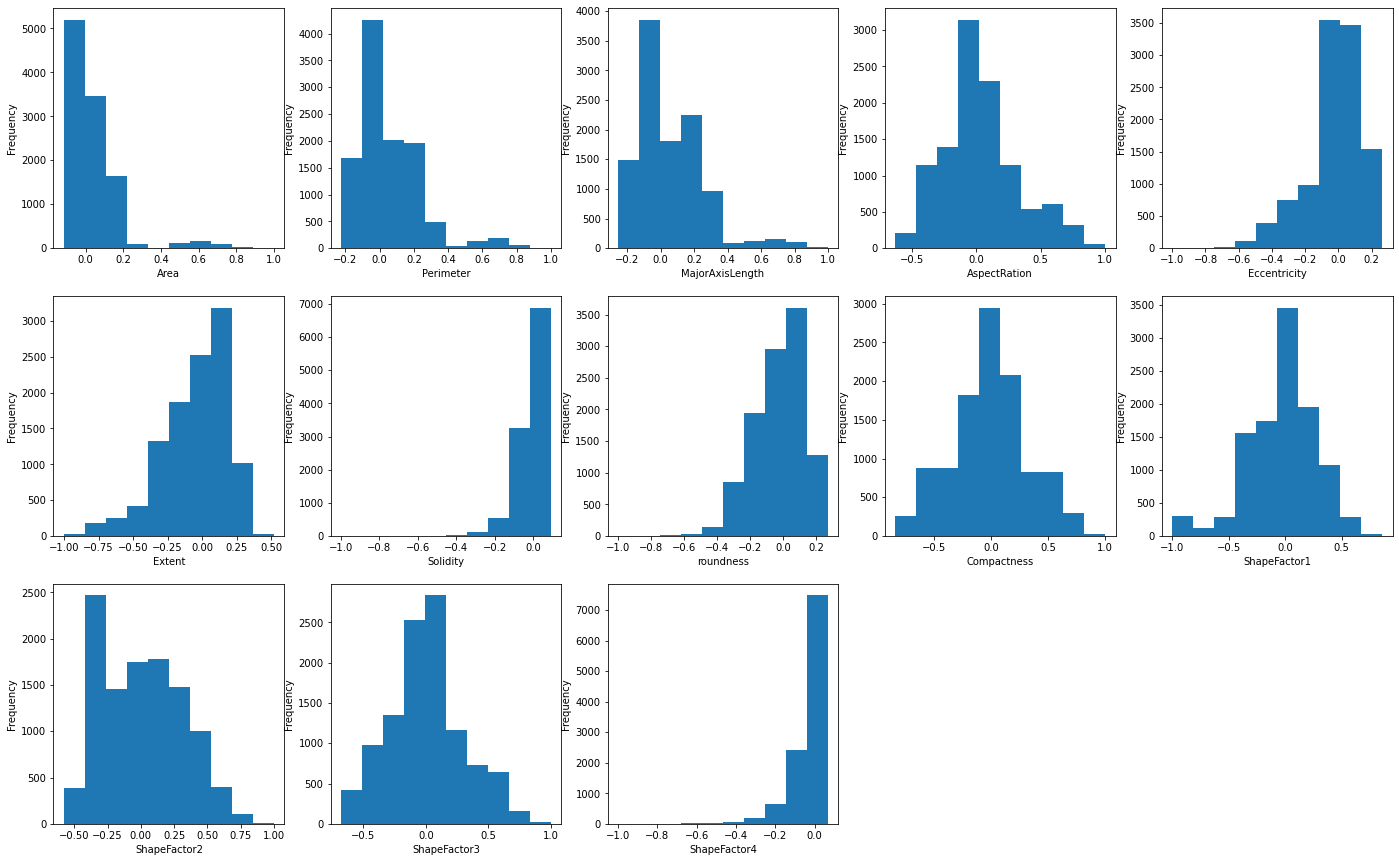

In [ ]:
# select numeric variables
numeric_vars =  ['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 
                 'ShapeFactor4']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    X_MaxAbsScaler_scaled[var].plot(kind = 'hist')

In [ ]:
X_normalized = apply_normalize(X_copy)
X_normalized

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
0,0.044943,0.103446,0.158189,-0.014990,0.475406,0.150215,0.044016,0.071084,-0.526655,-0.008253,-0.189924,-0.432756,0.032481,-0.272438,-0.359754,0.031333
1,-0.000632,-0.030969,-0.071051,0.084738,-0.377096,-0.321866,-0.001723,-0.001072,0.057852,0.085660,0.236326,0.521696,-0.182486,0.351264,0.495180,0.020407
2,-0.102234,-0.194192,-0.211028,-0.154229,-0.249248,-0.158190,-0.099411,-0.188033,0.333114,0.002319,0.198905,0.315806,0.407677,0.498920,0.289258,0.045515
3,-0.087758,-0.157400,-0.198254,-0.102865,-0.345900,-0.209559,-0.085533,-0.153902,0.091936,0.033769,0.167202,0.444476,0.231788,0.486317,0.404825,0.183989
4,-0.033664,-0.051427,-0.114538,0.009207,-0.380760,-0.231663,-0.032484,-0.057721,-0.494807,0.006567,0.046014,0.468764,-0.027377,0.360850,0.426885,0.007577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,-0.041542,-0.082848,-0.132614,0.000880,-0.382671,-0.294839,-0.040609,-0.073312,0.064350,0.024093,0.137082,0.513964,-0.006949,0.460494,0.482170,0.034194
10830,-0.127283,-0.227049,-0.235619,-0.221983,-0.143848,-0.083135,-0.123594,-0.233224,-0.296774,-0.012855,0.130693,0.179920,0.597558,0.453747,0.162792,0.055021
10831,0.191774,0.274568,0.336344,0.205315,0.317100,0.131792,0.185678,0.276033,0.062666,0.047424,-0.074898,-0.334216,-0.383595,-0.384707,-0.288765,-0.044115


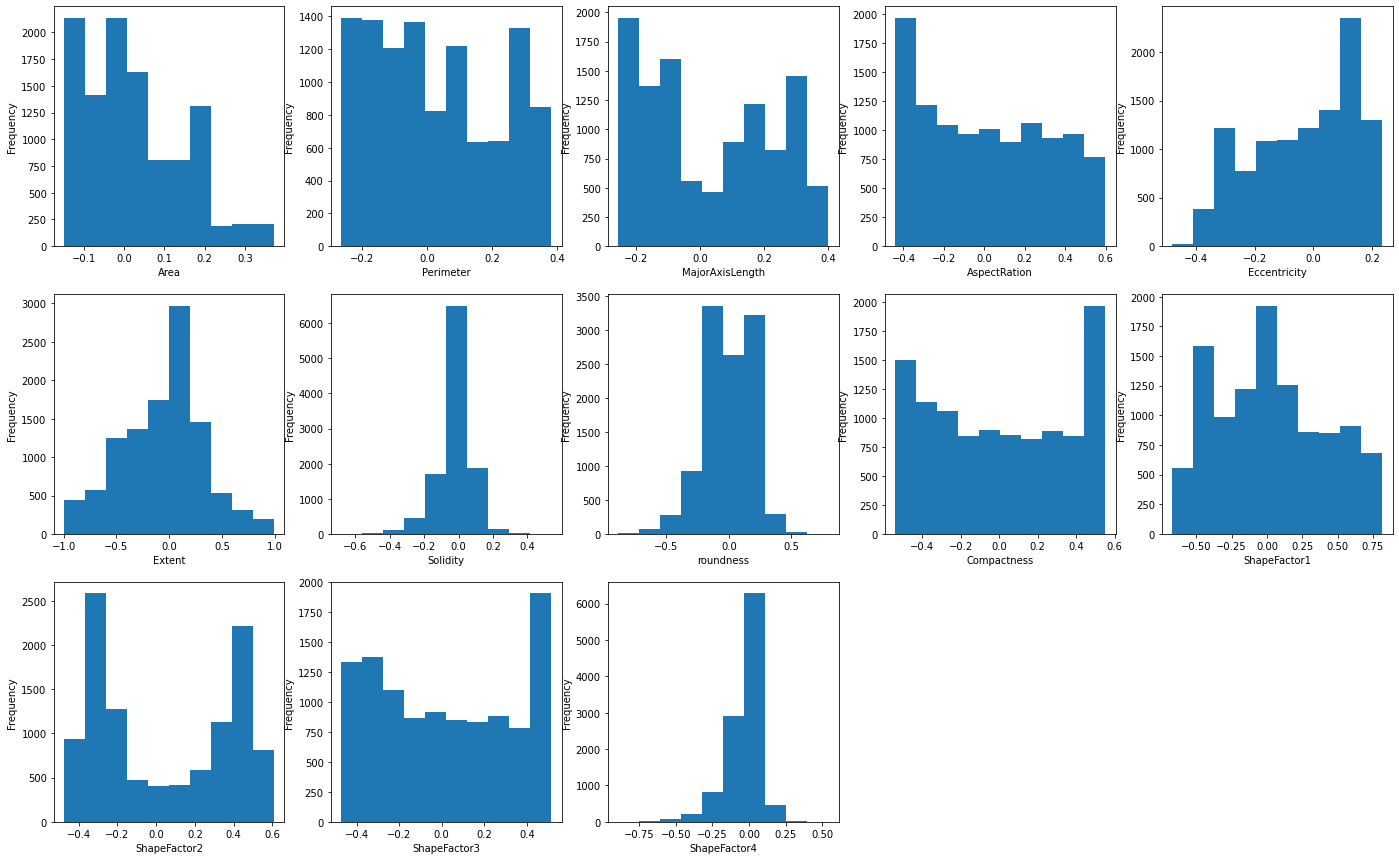

In [ ]:
# select numeric variables
numeric_vars =  ['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 
                 'ShapeFactor4']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    X_normalized[var].plot(kind = 'hist')

In [ ]:
X_PowerTransformer = apply_PowerTransformer(X_copy)
X_PowerTransformer

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
0,0.360410,0.477160,0.698789,-0.088322,1.426615,1.135397,0.356796,0.362735,-1.192198,0.010109,-0.960145,-1.275932,0.072194,-0.918044,-1.235472,0.450392
1,-0.043598,-0.242864,-0.453288,0.477846,-1.376748,-1.509403,-0.059147,-0.033125,0.285839,1.130830,1.313414,1.431696,-0.520689,0.899950,1.449278,0.333775
2,-1.183434,-1.261545,-1.279302,-0.979883,-0.879292,-0.817722,-1.183059,-1.203447,1.029572,0.126155,1.083086,0.867916,0.998076,1.271993,0.861095,0.607048
3,-0.998685,-1.017770,-1.199987,-0.637017,-1.252872,-1.053663,-1.001717,-0.973970,0.376253,0.486271,0.892610,1.221316,0.578925,1.240899,1.194796,2.481769
4,-0.375548,-0.361678,-0.699725,0.054390,-1.391402,-1.149505,-0.376152,-0.365371,-1.114630,0.173475,0.204309,1.287621,-0.087852,0.924639,1.257425,0.201271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,-0.459976,-0.549094,-0.804865,0.005684,-1.399055,-1.406500,-0.465296,-0.460217,0.303039,0.373064,0.715633,1.410687,-0.032785,1.176816,1.412961,0.481508
10830,-1.522258,-1.486244,-1.434214,-1.457216,-0.489989,-0.435448,-1.517784,-1.518211,-0.625455,-0.039643,0.678591,0.490452,1.426539,1.159989,0.484123,0.715465
10831,1.341154,1.267228,1.455033,1.093583,0.987734,0.986841,1.327097,1.349210,0.298579,0.649707,-0.419295,-0.984957,-1.118234,-1.294454,-0.986353,-0.287055


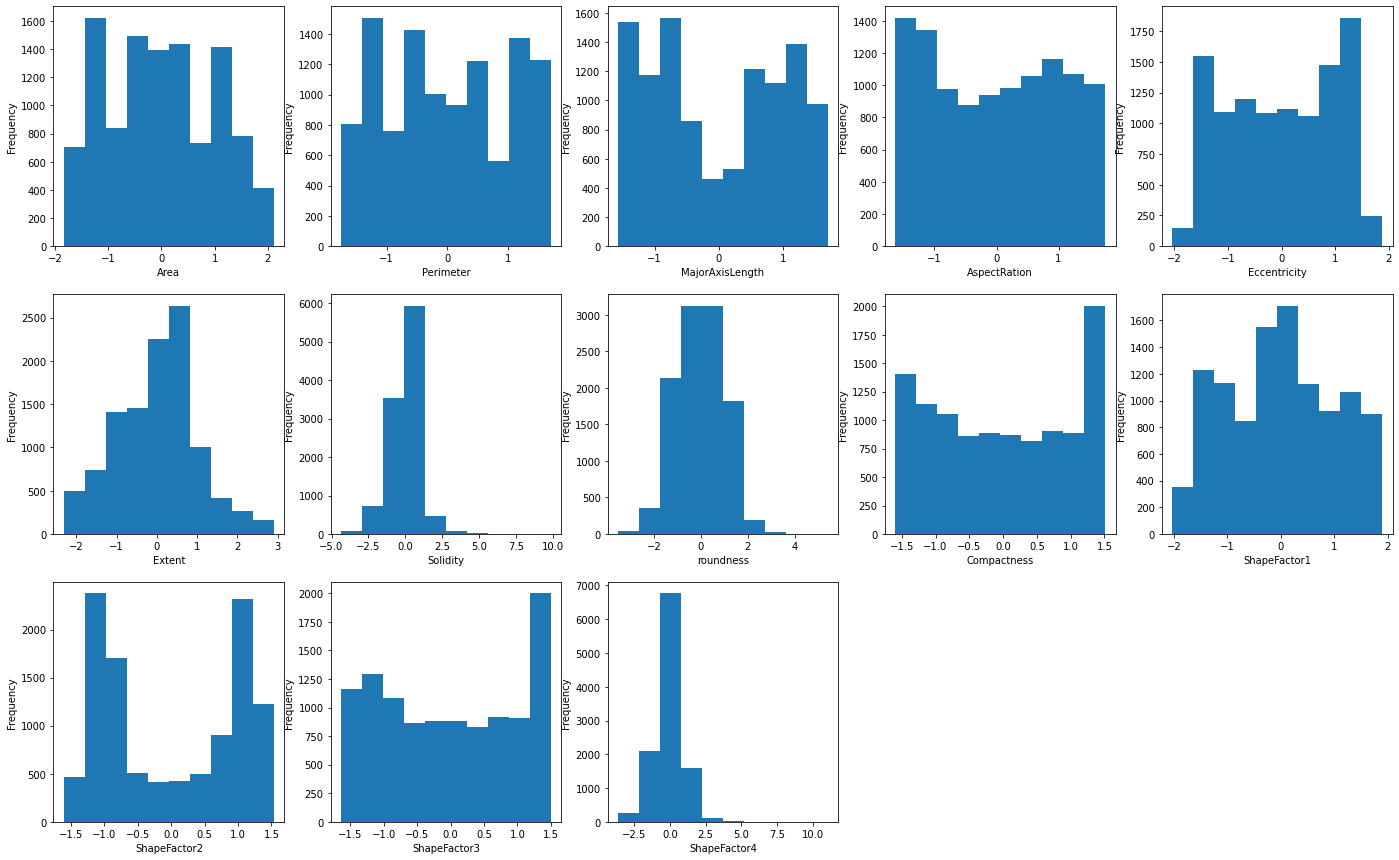

In [ ]:
# select numeric variables
numeric_vars =  ['Area', 'Perimeter', 'MajorAxisLength', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 
                 'ShapeFactor4']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    X_PowerTransformer[var].plot(kind = 'hist')

**So the best feature transformer is apply_normalize**

### Start Spliting the data

In [ ]:
X = df_all.drop(['y'], axis=1)
y = df_all['y']
print(X)
print(y)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                        
0      58238    971.303       397.202654       186.945510      2.124697   
1      44515    757.601       265.590470       213.967453      1.241266   
2      31662    653.783       239.902428       168.421505      1.424417   
3      38778    734.020       268.446281       184.061923      1.458456   
4      42530    775.403       281.212824       193.236878      1.455275   
...      ...        ...              ...              ...           ...   
10829  37777    716.007       250.174662       192.704033      1.298233   
10830  32187    667.621       247.778775       165.786862      1.494562   
10831  81837   1095.937       433.838186       241.527026      1.796230   
10832  48212    826.362       309.639462       199.285811      1.553746   
10833  28026    610.943       215.446569       165.740377      1.299904   

       Eccentricity  Con

In [ ]:
X_train, X_test, y_train, y_test = My_train_test_split(X, y)
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
92,26879,601.690,218.053277,157.226802,1.386871,0.692885,27237,184.995691,0.736875,0.986856,0.932991,0.848397,0.008112,0.002593,0.719777,0.998238
6124,43832,754.068,255.897708,218.669453,1.170249,0.519420,44167,236.238514,0.804744,0.992415,0.968680,0.923176,0.005838,0.002616,0.852253,0.997348
7314,80590,1134.764,400.653334,257.541435,1.555685,0.766031,82249,320.328542,0.795911,0.979830,0.786466,0.799515,0.004972,0.001253,0.639225,0.994433
5924,26185,600.178,218.074899,153.305249,1.422488,0.711196,26496,182.591833,0.710661,0.988262,0.913487,0.837290,0.008328,0.002525,0.701054,0.997241
550,30987,646.361,237.363270,166.667075,1.424176,0.712019,31235,198.629992,0.707288,0.992060,0.932050,0.836819,0.007660,0.002317,0.700265,0.997301


## Training Data Processing

In [ ]:
df_train = X_train.join(y_train)
df_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
92,26879,601.690,218.053277,157.226802,1.386871,0.692885,27237,184.995691,0.736875,0.986856,0.932991,0.848397,0.008112,0.002593,0.719777,0.998238,4
6124,43832,754.068,255.897708,218.669453,1.170249,0.519420,44167,236.238514,0.804744,0.992415,0.968680,0.923176,0.005838,0.002616,0.852253,0.997348,6
7314,80590,1134.764,400.653334,257.541435,1.555685,0.766031,82249,320.328542,0.795911,0.979830,0.786466,0.799515,0.004972,0.001253,0.639225,0.994433,1
5924,26185,600.178,218.074899,153.305249,1.422488,0.711196,26496,182.591833,0.710661,0.988262,0.913487,0.837290,0.008328,0.002525,0.701054,0.997241,4
550,30987,646.361,237.363270,166.667075,1.424176,0.712019,31235,198.629992,0.707288,0.992060,0.932050,0.836819,0.007660,0.002317,0.700265,0.997301,4


In [ ]:
get_num_of_samples(df_train)

Number of samples in class 4 = 2270
Number of samples in class 6 = 1297
Number of samples in class 1 = 846
Number of samples in class 7 = 1687
Number of samples in class 2 = 334
Number of samples in class 5 = 1190
Number of samples in class 3 = 1043


In [ ]:
df_test = X_test.join(y_test)
df_test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
1560,44165,771.361,263.842403,213.423154,1.236241,0.587941,44603,237.134191,0.749474,0.990180,0.932766,0.898772,0.005974,0.002405,0.807791,0.998625,6
7235,48178,863.116,359.840772,171.016998,2.104123,0.879847,48750,247.673444,0.795752,0.988267,0.812681,0.688286,0.007469,0.001034,0.473738,0.996803,5
1427,33952,672.498,241.528109,179.357252,1.346631,0.669742,34273,207.915918,0.771636,0.990634,0.943394,0.860835,0.007114,0.002410,0.741037,0.997904,4
9306,80165,1109.103,438.723467,233.952840,1.875265,0.845953,80993,319.482782,0.766440,0.989777,0.818938,0.728210,0.005473,0.000949,0.530290,0.994433,3
3573,55474,927.591,381.237502,186.063739,2.048962,0.872815,56164,265.766233,0.720067,0.987715,0.810189,0.697115,0.006872,0.001001,0.485969,0.995731,5


In [ ]:
get_num_of_samples(df_test)

Number of samples in class 6 = 324
Number of samples in class 5 = 298
Number of samples in class 4 = 567
Number of samples in class 3 = 261
Number of samples in class 7 = 422
Number of samples in class 1 = 211
Number of samples in class 2 = 84


In [ ]:
oversampled_Train = apply_Upsmote_Training(X_train, y_train)
oversampled_Train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,26879.000000,601.690000,218.053277,157.226802,1.386871,0.692885,27237.000000,184.995691,0.736875,0.986856,0.932991,0.848397,0.008112,0.002593,0.719777,0.998238,4
1,43832.000000,754.068000,255.897708,218.669453,1.170249,0.519420,44167.000000,236.238514,0.804744,0.992415,0.968680,0.923176,0.005838,0.002616,0.852253,0.997348,6
2,80590.000000,1134.764000,400.653334,257.541435,1.555685,0.766031,82249.000000,320.328542,0.795911,0.979830,0.786466,0.799515,0.004972,0.001253,0.639225,0.994433,1
3,26185.000000,600.178000,218.074899,153.305249,1.422488,0.711196,26496.000000,182.591833,0.710661,0.988262,0.913487,0.837290,0.008328,0.002525,0.701054,0.997241,4
4,30987.000000,646.361000,237.363270,166.667075,1.424176,0.712019,31235.000000,198.629992,0.707288,0.992060,0.932050,0.836819,0.007660,0.002317,0.700265,0.997301,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,42160.181510,779.947548,294.166346,183.352248,1.605342,0.781128,42728.242767,231.689469,0.699814,0.986705,0.871307,0.787862,0.006977,0.001659,0.620925,0.995559,7
15886,45737.853490,803.024593,297.132133,197.181610,1.508386,0.746448,46358.265875,241.319790,0.754474,0.986617,0.891402,0.812509,0.006496,0.001748,0.660454,0.994440,7
15887,57443.721346,921.858752,361.607269,203.231670,1.780932,0.826459,58111.230419,270.442172,0.705685,0.988567,0.849426,0.748087,0.006296,0.001217,0.559814,0.995616,7
15888,39954.126574,746.154746,265.382175,192.771634,1.377422,0.686108,40467.925872,225.546388,0.760300,0.987304,0.902147,0.850074,0.006642,0.002140,0.722781,0.994646,7


In [ ]:
get_num_of_samples(oversampled_Train)

Number of samples in class 4 = 2270
Number of samples in class 6 = 2270
Number of samples in class 1 = 2270
Number of samples in class 7 = 2270
Number of samples in class 2 = 2270
Number of samples in class 5 = 2270
Number of samples in class 3 = 2270


KeyError: ignored

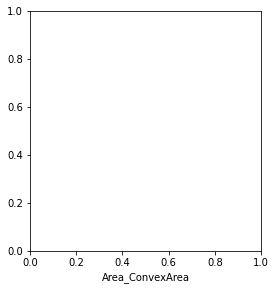

In [ ]:
# select numeric variables
numeric_vars =  ['Area_ConvexArea', 'Fibre_length', 'Fibre_width', 'Area_Circumference_ratio', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'ShapeFactor6', 'ShapeFactor1', 'ShapeFactor7','ShapeFactor8', 'ShapeFactor9', 
                 'ShapeFactor4','y']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    oversampled_Train[var].plot(kind = 'hist')

In [ ]:
X_train

In [ ]:
X_train_normalized = apply_normalize(X_train)
X_train_normalized

In [ ]:
# select numeric variables
numeric_vars =  ['Area_ConvexArea', 'Fibre_length', 'Fibre_width', 'Area_Circumference_ratio', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'ShapeFactor6', 'ShapeFactor1', 'ShapeFactor7','ShapeFactor8', 'ShapeFactor9', 
                 'ShapeFactor4']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    X_train_normalized[var].plot(kind = 'hist')

In [ ]:
X_train_PowerTransformer = apply_PowerTransformer(X_train)
X_train_PowerTransformer

In [ ]:
# select numeric variables
numeric_vars =  ['Area_ConvexArea', 'Fibre_length', 'Fibre_width', 'Area_Circumference_ratio', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'ShapeFactor6', 'ShapeFactor1', 'ShapeFactor7','ShapeFactor8', 'ShapeFactor9', 
                 'ShapeFactor4']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    X_train_PowerTransformer[var].plot(kind = 'hist')

In [ ]:
X_train_RobustScaler_scaled = apply_RobustScaler(X_train)
X_train_RobustScaler_scaled.head()

In [ ]:
# select numeric variables
numeric_vars =  ['Area_ConvexArea', 'Fibre_length', 'Fibre_width', 'Area_Circumference_ratio', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'ShapeFactor6', 'ShapeFactor1', 'ShapeFactor7','ShapeFactor8', 'ShapeFactor9', 
                 'ShapeFactor4']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    X_train_RobustScaler_scaled[var].plot(kind = 'hist')

## Testing Data Processing

In [ ]:
oversampled_Test = apply_Upsmote_valid(X_test, y_test)
oversampled_Test

In [ ]:
get_num_of_samples(oversampled_Test)

In [ ]:
# select numeric variables
numeric_vars =  ['Area_ConvexArea', 'Fibre_length', 'Fibre_width', 'Area_Circumference_ratio', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'ShapeFactor6', 'ShapeFactor1', 'ShapeFactor7','ShapeFactor8', 'ShapeFactor9', 
                 'ShapeFactor4']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    oversampled_Test[var].plot(kind = 'hist')

In [ ]:
X_test_normalized = apply_normalize(X_test)
X_test_normalized

In [ ]:
# select numeric variables
numeric_vars =  ['Area_ConvexArea', 'Fibre_length', 'Fibre_width', 'Area_Circumference_ratio', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'ShapeFactor6', 'ShapeFactor1', 'ShapeFactor7','ShapeFactor8', 'ShapeFactor9', 
                 'ShapeFactor4']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    X_test_normalized[var].plot(kind = 'hist')

In [ ]:
X_test_PowerTransformer = apply_PowerTransformer(X_test)
X_test_PowerTransformer

In [ ]:
# select numeric variables
numeric_vars =  ['Area_ConvexArea', 'Fibre_length', 'Fibre_width', 'Area_Circumference_ratio', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'ShapeFactor6', 'ShapeFactor1', 'ShapeFactor7','ShapeFactor8', 'ShapeFactor9', 
                 'ShapeFactor4']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    X_test_PowerTransformer[var].plot(kind = 'hist')

In [ ]:
X_test_RobustScaler_scaled = apply_RobustScaler(X_test)
X_test_RobustScaler_scaled.head()

In [ ]:
# select numeric variables
numeric_vars =  ['Area_ConvexArea', 'Fibre_length', 'Fibre_width', 'Area_Circumference_ratio', 'Eccentricity', 'Extent', 'Solidity', 
                 'roundness', 'ShapeFactor6', 'ShapeFactor1', 'ShapeFactor7','ShapeFactor8', 'ShapeFactor9', 
                 'ShapeFactor4']
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    X_test_RobustScaler_scaled[var].plot(kind = 'hist')

## Feature Combination

In [ ]:
df_all = read_data(path)
df_all.head()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_all.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

## Create Columns

In [ ]:
df_try = df_all.copy()

In [ ]:
df_try['Bounding_rectangular_area'] = df_try['Area']/df_try['Extent']

In [ ]:
df_try['Area_ConvexArea'] = df_try['ConvexArea'] - df_try['Area']  

In [ ]:
df_try['Circle_Area_ED'] = math.pi*df_try['EquivDiameter']**2

In [ ]:
df_try['Circle_circumference_ED'] = 2*math.pi*df_try['EquivDiameter']

In [ ]:
df_try['Fibre_length'] = (df_try['Perimeter'] - np.sqrt(2*df_try['Perimeter']**2 -df_try['Area']))/4

In [ ]:
df_try['Fibre_width'] = df_try['Area']  / df_try['Fibre_length']

In [ ]:
df_try['ShapeFactor5'] = df_try['ShapeFactor3']  / df_try['ShapeFactor4']

In [ ]:
df_try['Area_Circumference_ratio'] = df_try['Circle_circumference_ED'] / df_try['Area_ConvexArea']

In [ ]:
df_try['ShapeFactor6'] = df_try['ShapeFactor2']**2 / df_try['ShapeFactor3']

In [ ]:
df_try['ShapeFactor7'] =((df_try['ShapeFactor2'] / df_try['ShapeFactor3'] * df_try['Perimeter']) ) * np.sqrt(df_try['Extent'])

In [ ]:
df_try['ShapeFactor8'] = 2 * math.pi * df_try['MinorAxisLength'] / np.sqrt(df_try['MajorAxisLength'])

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_try.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [ ]:
X = df_try.drop(['y'], axis=1)
y = df_try['y']
print(X)
print(y)

In [ ]:
# df_New = X.join(y)
# df_New.head()

In [ ]:
# df_New.to_csv('/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Data_New.csv', index=False)

In [ ]:
# df_try.head()

## Drop Columns

In [ ]:
df_try = df_try.drop(['Area'], axis=1)

In [ ]:
df_try = df_try.drop(['ShapeFactor5'], axis=1)

In [ ]:
df_try = df_try.drop(['ConvexArea'], axis=1)

In [ ]:
df_try = df_try.drop(['Bounding_rectangular_area'], axis=1)

In [ ]:
df_try = df_try.drop(['Perimeter'], axis=1)

In [ ]:
df_try = df_try.drop(['EquivDiameter'], axis=1)

In [ ]:
df_try = df_try.drop(['Circle_circumference_ED'], axis=1)

In [ ]:
df_try = df_try.drop(['Circle_Area_ED'], axis=1)

In [ ]:
df_try = df_try.drop(['ShapeFactor2'], axis=1)

In [ ]:
df_try = df_try.drop(['ShapeFactor3'], axis=1)

In [ ]:
df_try = df_try.drop(['Compactness'], axis=1)

In [ ]:
df_try = df_try.drop(['AspectRation'], axis=1)

In [ ]:
df_try = df_try.drop(['MinorAxisLength'], axis=1)

In [ ]:
df_try = df_try.drop(['MajorAxisLength'], axis=1)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_try.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [ ]:
df_try.to_csv('/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Data_New_R1.csv', index=False)

In [ ]:
df_try.head()

## Create Columns

In [ ]:
df_try1 = df_try.copy()

In [ ]:
df_try1['ShapeFactor9'] = (2* math.pi * (df_all['Solidity'] + np.sqrt(df_all['Compactness']))) / df_all['EquivDiameter']

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_try1.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [ ]:
df_try1.to_csv('/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Data_New_R2.csv', index=False)

In [ ]:
df_try1.head()

In [ ]:
round(df_try1.isnull().sum(axis=0)*100/df_try1.shape[0],2)

In [ ]:
bool_series = df_try1.duplicated().sum()
bool_series 

In [ ]:
df_all['ShapeFactor9'] = 2 * math.pi * (df_all['Solidity'] + df_all['Eccentricity'])

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_all.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

>## Cross Validation

In [ ]:
# # cross validation on all data
# def apply_stratified_KFold(df_all):
#   data = df_all.values
#   x, y = data[:, :-1], data[:, -1]
#   skf = StratifiedKFold(n_splits=5)
#   skf.get_n_splits(x, y)
#   col_names = df_all.columns.to_list()
#   StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
#   train_dfs,valid_dfs =list(),list()
 
#   for train_index, test_index in skf.split(x, y):
#       #print("TRAIN:", train_index, "TEST:", test_index)
#       X_train, X_test = x[train_index], x[test_index]
#       y_train, y_test = y[train_index], y[test_index]
#       trainX = pd.DataFrame(X_train)
#       trainy = pd.DataFrame(y_train)

#       testX = pd.DataFrame(X_test)
#       testy = pd.DataFrame(y_test)

#       train=pd.concat([trainX,trainy],axis=1)
#       test=pd.concat([testX,testy],axis=1)
      
#       train.columns = col_names

#       test.columns = col_names
    
#       train_dfs.append(train)
#       valid_dfs.append(test)

#   return train_dfs ,valid_dfs

>## Feature Selection

In [ ]:
df_try.columns

In [ ]:
X = df_try.drop(['y'], axis=1)
y = df_try['y']
print(X)
print(y)

## A. Filter Methods

## 1. Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances , df_try.columns[0:len(df_try.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [ ]:
# X = X.drop(['Area'], axis=1)

In [ ]:
# X = X.drop(['Perimeter'], axis=1)

In [ ]:
# X = X.drop(['MinorAxisLength'], axis=1)

In [ ]:
# X = X.drop(['MajorAxisLength'], axis=1)

In [ ]:
# X = X.drop(['AspectRation'], axis=1)

In [ ]:
# X = X.drop(['Eccentricity'], axis=1)

In [ ]:
X = X.drop(['ConvexArea'], axis=1) #high

In [ ]:
X = X.drop(['EquivDiameter'], axis=1) #high

In [ ]:
# X = X.drop(['Extent'], axis=1)

In [ ]:
# X = X.drop(['Solidity'], axis=1)

In [ ]:
# X = X.drop(['roundness'], axis=1)

In [ ]:
X = X.drop(['Compactness'], axis=1) #high

In [ ]:
# X = X.drop(['ShapeFactor1'], axis=1)

In [ ]:
# X = X.drop(['ShapeFactor2'], axis=1)

In [ ]:
# X = X.drop(['ShapeFactor3'], axis=1)

In [ ]:
# X = X.drop(['ShapeFactor4'], axis=1)

In [ ]:
# X = X.drop(['Bounding_rectangular_area'], axis=1)

In [ ]:
# X = X.drop(['Area_ConvexArea'], axis=1)

In [ ]:
# X = X.drop(['Circle_Area_ED'], axis=1)

In [ ]:
# X = X.drop(['Circle_circumference_ED'], axis=1)

In [ ]:
# X = X.drop(['Fibre_width'], axis=1)

In [ ]:
# X = X.drop(['Fibre_length'], axis=1)

In [ ]:
X = X.drop(['ShapeFactor5'], axis=1) #high

In [ ]:
# X = X.drop(['Area_Circumference_ratio'], axis=1)

In [ ]:
# X = X.drop(['ShapeFactor6'], axis=1)

In [ ]:
# X = X.drop(['ShapeFactor7'], axis=1)

In [ ]:
# X = X.drop(['ShapeFactor8'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = My_train_test_split(X, y)

In [ ]:
oversampled_train = apply_Upsmote_Training(X_train, y_train)
oversampled_train

In [ ]:
X_train = oversampled_train.drop(['y'], axis=1)
y_train = oversampled_train['y']
print(X_train)
print(y_train)

In [ ]:
oversampled_Test = apply_Upsmote_valid(X_test, y_test)
oversampled_Test

In [ ]:
X_test = oversampled_Test.drop(['y'], axis=1)
y_test = oversampled_Test['y']
print(X_test)
print(y_test)

In [ ]:
X_train_scaled = apply_RobustScaler(X_train)
X_train_scaled.head()

In [ ]:
X_train = X_train_scaled

In [ ]:
X_test_scaled = apply_RobustScaler(X_test)
X_test_scaled.head()

In [ ]:
X_test = X_test_scaled

In [ ]:
best_params =  {'C': 100, 'gamma': 1, 'kernel': 'poly'}
svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train,X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train,X_test, y_test, train=False)

## 2. Fisher's Score

In [ ]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

ranks = fisher_score.fisher_score(X,y)
feat_importances = pd.Series(ranks, df_try.columns[0:len(df_try.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

## 3. MAD Mean Absolute Difference

In [ ]:
mean_abs_diff = np.sum(np.abs(np.abs(X-np.mean(X,axis=0))))/X.shape[0]
plt.bar(np.arange(X.shape[1]), mean_abs_diff, color='teal')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

In [ ]:
def apply_pca(scaled_X,n_components):
  pca = PCA(n_components)
  pca.fit(scaled_X)
  return pca

In [ ]:
# def apply_svd(scaled_X,n_components):

In [ ]:
# def apply_Lasso(scaled_X,n_components):
# # 

### 5. Model Tuning and Selection

## 1. SVM model

In [ ]:
svc_model = SVC(C=1.0, kernel='rbf', max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.20)
svc_model.fit(x_train[model_columns], y_train)
predictions_SVC = svc_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_SVC, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_SVC))

## 2. KNN Model

In [ ]:
kn_model = KNeighborsClassifier(algorithm='auto', weights ='distance', n_neighbors=10)
kn_model.fit(x_train[model_columns], y_train)
predictions_KN = kn_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_KN, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_KN))

## 3. Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=16, ccp_alpha=0.00001, random_state=42, criterion='gini')
dt_model.fit(x_train[model_columns], y_train)
predictions_DT = dt_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_DT, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_DT))

## 4. MLP Model

In [ ]:
mlp_model = MLPClassifier(solver='adam', activation='logistic', alpha=1e-4, random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.2, warm_start=True, verbose=False, learning_rate ='adaptive', learning_rate_init=0.01)
mlp_model = mlp_model.fit(x_train[model_columns], y_train)
predictions_MLP = mlp_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_MLP, average='micro'))
print("Classification Report")
print(classification_report(y_val, predictions_MLP))

## 5. LightGB Model

In [ ]:
lgb_model = LGBMClassifier(objective='multiclass', random_state=42, learning_rate=0.03, reg_alpha=0.0001)
lgb_model.fit(x_train[model_columns], y_train)
predictions_LGB = lgb_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_LGB, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_LGB))

## Voting Classifier

In [ ]:
classifiers = [
                ('SVC:', svc_model),
                ('MLP:', mlp_model),
                ('LGB:', lgb_model),
#                 ('GB:', gb_model),
#                 ('XGB:', xgb_model),
#                 ('BAG:', bag_model),
                ('KN:', kn_model),
#                 ('DT:', dt_model),
#                 ('NB:', nb_model),
                ]
    
for clf_name, clf in classifiers:
#     clf.fit(x_train[model_columns], y_train)
    y_pred = clf.predict(x_val[model_columns])
    print(clf_name, f1_score(y_val, y_pred, average='micro'))

vc = VotingClassifier(estimators=classifiers)
# kfold = StratifiedKFold(n_splits=10, random_state=42)
# cv_results = cross_val_score(vc, x_train[model_columns], y_train, cv=kfold, scoring='f1_micro')
vc.fit(x_train[model_columns], y_train)
y_pred_voting = vc.predict(x_val[model_columns])
print()
print('Voting Classifier: ',f1_score(y_val, y_pred_voting, average='micro'))

# Run

In [ ]:
def run_experiment(path,modelname):
  # 1. raed data
  df= read_data(path=path)
  # 2. Upsampling
  oversampled_data=apply_Upsmote(df)
  # 3. Apply Kfold
  train_dfs ,valid_dfs= apply_stratifiedKFold(oversampled_data)

  # 4. do for each fold
  Accuracies_train,Accuracies_valid=list(),list()
  for train_df , valid_df in zip(train_dfs,valid_dfs):
    train_df= shuffle(train_df)  #1. shuffle
    scaler= apply_MinMaxScaler(train_df.iloc[:,:-1])  #2. scaling
    scaled_train = scaler.transform(train_df.iloc[:,:-1])
    pca = apply_pca(scaled_train ,n_components=7) #3. extract features
    pca_train = pca.transform(scaled_train)

    # Apply on validation
    scaled_valid=scaler.transform(valid_df.iloc[:,:-1])
    pca_valid=pca.transform(scaled_valid)

    xtrain,ytrain =pca_train,train_df.iloc[:,-1]
    xvalid,yvalid =pca_valid,valid_df.iloc[:,-1]
    
    score_train,f1score_val,model=apply_model(modelname, xtrain,ytrain,xvalid,yvalid) #4. Apply model
    Accuracies_train.append(score_train)
    Accuracies_valid.append(f1score_val)

  return np.mean(Accuracies_train), np.mean(Accuracies_valid),scaler,pca,model

In [ ]:
# save model 
with open('model1.pkl', 'wb') as file1:
        pickle.dump(voting_model, file1)

# Test Kaggle

In [ ]:
path ='/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/test.csv'
df= pd.read_csv(path)
df.head()

In [ ]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

In [ ]:
scaled_df= apply_PowerTransformer(df.iloc[:,1:])
# ft_selected=pca.transform(scaled_df)

# Load pretrained model
pkl_filename='model.pkl'
with open(pkl_filename, 'rb') as file:
    pretrained_model = pickle.load(file)
    prediction= pretrained_model.predict(scaled_df) 
pred_df= pd.DataFrame(prediction)

In [ ]:
submit_df =pd.concat([df.iloc[:,0],pred_df],axis=1)
submit_df.columns=['ID','y']
submit_df.replace({'y':{1:'BARBUNYA',2:'BOMBAY',3:'CALI',4:'DERMASON',5:'HOROZ',6:'SEKER',7:'SIRA'}},inplace=True)
submit_df.to_csv('svm_clf_submission.csv', index = False)
submit_df